In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import zscore
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [4]:
df = pd.read_csv('/content/auto-mpg.csv')

print(df.shape)
print(df.info())
print(df.head())
print(df.isnull().sum())
print("Duplicated rows:", df.duplicated().sum())


(398, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8    

In [5]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

# Convert 'horsepower' to numeric
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Clean column names
df.columns = df.columns.str.strip()


In [7]:
df = df[(np.abs(zscore(df['mpg'])) < 3)]

In [8]:
# Drop 'car name' column
df.drop(['car name'], axis=1, inplace=True)


In [9]:
df = pd.get_dummies(df, columns=['origin'], drop_first=True) #endoce origin


In [10]:
scaler = StandardScaler()
high_value_cols = ['displacement', 'horsepower', 'weight', 'acceleration']
df[high_value_cols] = scaler.fit_transform(df[high_value_cols])

In [11]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,392.000000,392.000000,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,392.000000
mean,23.445918,5.471939,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16,75.979592
std,7.805007,1.705783,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,3.683737
min,9.000000,3.000000,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00,70.000000
25%,17.000000,4.000000,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01,73.000000
50%,22.750000,4.000000,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02,76.000000
75%,29.000000,8.000000,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01,79.000000
max,46.600000,8.000000,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00,82.000000


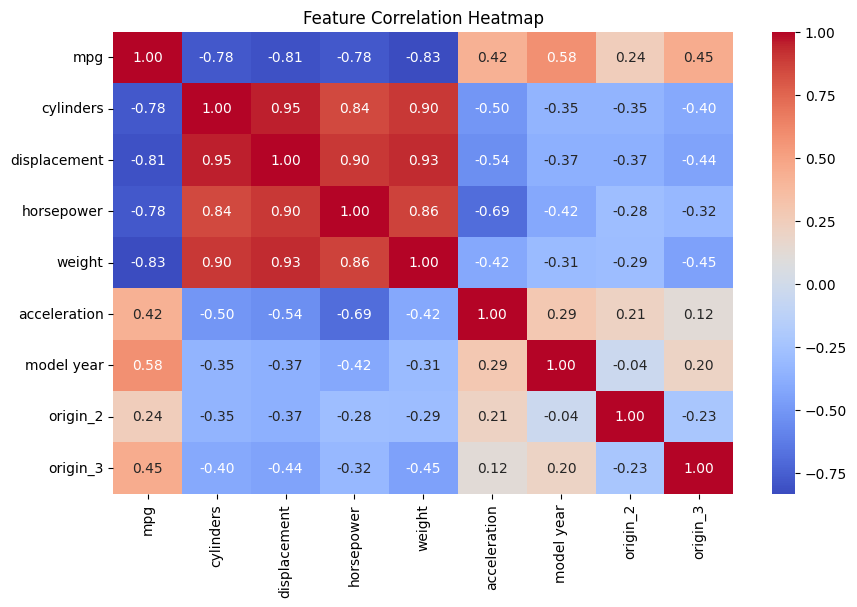

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [13]:

X = df.drop('mpg', axis=1)
y = df['mpg']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

In [16]:


# Evaluate all models again on this best split
print("\n" + "="*40)
print(f"✅ Final Evaluation ")
print("="*40)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Train metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Test metrics
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print
    print(f"\n{name}")
    print(f"Train MSE:  {train_mse:.2f}   | Test MSE:  {test_mse:.2f}")
    print(f"Train MAE:  {train_mae:.2f}   | Test MAE:  {test_mae:.2f}")
    print(f"Train RMSE: {train_rmse:.2f}  | Test RMSE: {test_rmse:.2f}")
    print(f"Train R²:   {train_r2:.4f}   | Test R²:   {test_r2:.4f}")



✅ Final Evaluation 

Linear Regression
Train MSE:  10.81   | Test MSE:  10.60
Train MAE:  2.54   | Test MAE:  2.46
Train RMSE: 3.29  | Test RMSE: 3.26
Train R²:   0.8287   | Test R²:   0.7923

Ridge Regression
Train MSE:  10.82   | Test MSE:  10.61
Train MAE:  2.54   | Test MAE:  2.46
Train RMSE: 3.29  | Test RMSE: 3.26
Train R²:   0.8286   | Test R²:   0.7921

Lasso Regression
Train MSE:  11.23   | Test MSE:  10.54
Train MAE:  2.56   | Test MAE:  2.40
Train RMSE: 3.35  | Test RMSE: 3.25
Train R²:   0.8220   | Test R²:   0.7935


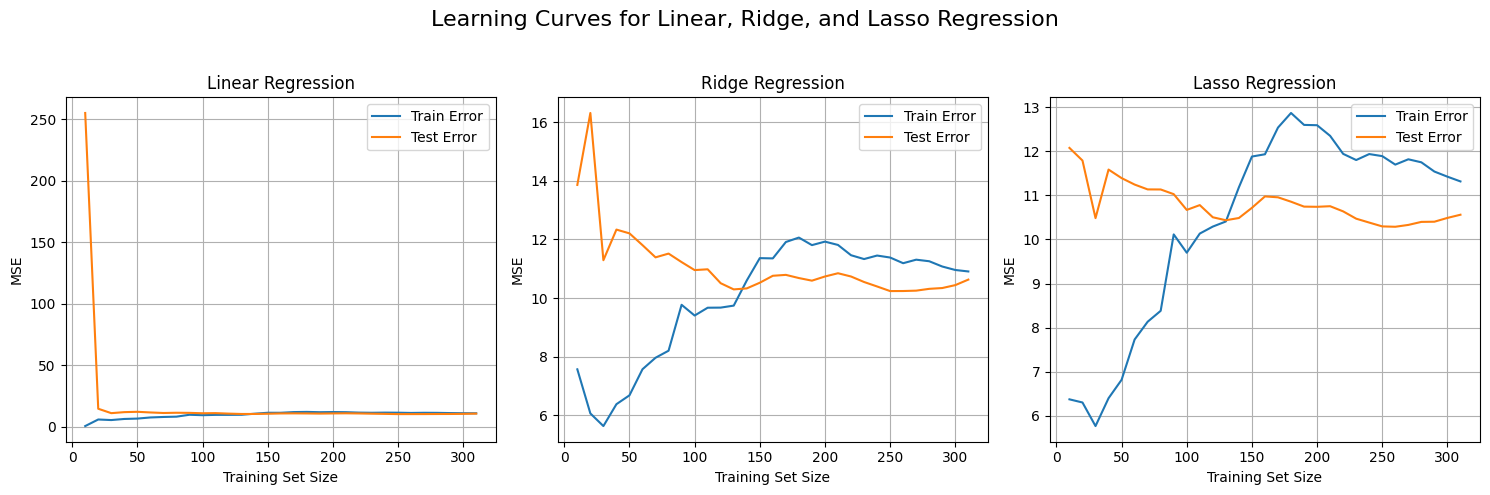

In [17]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

# Training sizes
sizes = range(10, len(X_train), 10)

plt.figure(figsize=(15, 5))

# Loop over models
for i, (name, model) in enumerate(models.items(), 1):
    train_errors = []
    test_errors = []

    for size in sizes:
        model.fit(X_train[:size], y_train[:size])
        train_pred = model.predict(X_train[:size])
        test_pred = model.predict(X_test)

        train_mse = mean_squared_error(y_train[:size], train_pred)
        test_mse = mean_squared_error(y_test, test_pred)

        train_errors.append(train_mse)
        test_errors.append(test_mse)

    # Plotting
    plt.subplot(1, 3, i)
    plt.plot(sizes, train_errors, label='Train Error')
    plt.plot(sizes, test_errors, label='Test Error')
    plt.title(f"{name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)

plt.suptitle("Learning Curves for Linear, Ridge, and Lasso Regression", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [27]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU

In [28]:
loss_function = 'mse'
metrics = ['mse']


In [29]:


model_nn = Sequential()

# Hidden Layers with ReLU or LeakyReLU
model_nn.add(Dense(64, kernel_regularizer=l2(0.001), input_dim=X_train.shape[1]))
model_nn.add(LeakyReLU(alpha=0.1))
model_nn.add(Dropout(0.3))

model_nn.add(Dense(32, kernel_regularizer=l2(0.001)))
model_nn.add(LeakyReLU(alpha=0.1))
model_nn.add(Dropout(0.2))

# Output Layer (no activation for regression)
model_nn.add(Dense(1))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [30]:
# ✅ Compile with MBGD (Mini-Batch Gradient Descent)
optimizer = Adam(learning_rate=0.001)
model_nn.compile(
    loss=loss_function,
    optimizer=optimizer,
   metrics=metrics
)

# ✅ Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# ✅ Train model
history = model_nn.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,  # MBGD
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 225ms/step - loss: 756.0925 - mse: 756.0355 - val_loss: 178.6747 - val_mse: 178.6175
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 210.6395 - mse: 210.5823 - val_loss: 44.9826 - val_mse: 44.9251
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 184.0121 - mse: 183.9545 - val_loss: 50.6422 - val_mse: 50.5845
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 167.5768 - mse: 167.5191 - val_loss: 40.3828 - val_mse: 40.3250
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 117.0759 - mse: 117.0182 - val_loss: 46.0388 - val_mse: 45.9809
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 116.2220 - mse: 116.1641 - val_loss: 42.2620 - val_mse: 42.2038
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 112.0333 - mse: 111.9751 - val_loss: 37.2379 - val_mse: 37.1795
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 98.5523 - mse: 98.4938 - val_loss: 36.0885 - val_mse: 36.0298
Epoch 9/100

In [36]:
# ---- Train Predictions ----
y_train_pred = model_nn.predict(X_train).flatten()
y_train_true = y_train.values  # <- FIXED

train_mse = mean_squared_error(y_train_true, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_true, y_train_pred)
train_r2 = r2_score(y_train_true, y_train_pred)

# ---- Test Predictions ----
y_test_pred = model_nn.predict(X_test).flatten()
y_test_true = y_test.values  # <- FIXED

test_mse = mean_squared_error(y_test_true, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_true, y_test_pred)
test_r2 = r2_score(y_test_true, y_test_pred)

# ---- Final Evaluation ----
print("="*40)
print("✅ Final Training and Test Performance (Regression)")
print(f"Train MSE  : {train_mse:.4f}   | Test MSE  : {test_mse:.4f}")
print(f"Train RMSE : {train_rmse:.4f}   | Test RMSE : {test_rmse:.4f}")
print(f"Train MAE  : {train_mae:.4f}   | Test MAE  : {test_mae:.4f}")
print(f"Train R²   : {train_r2:.4f}   | Test R²   : {test_r2:.4f}")
print("="*40)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
✅ Final Training and Test Performance (Regression)
Train MSE  : 14.8984   | Test MSE  : 11.6352
Train RMSE : 3.8598   | Test RMSE : 3.4110
Train MAE  : 2.7943   | Test MAE  : 2.5692
Train R²   : 0.7639   | Test R²   : 0.7720


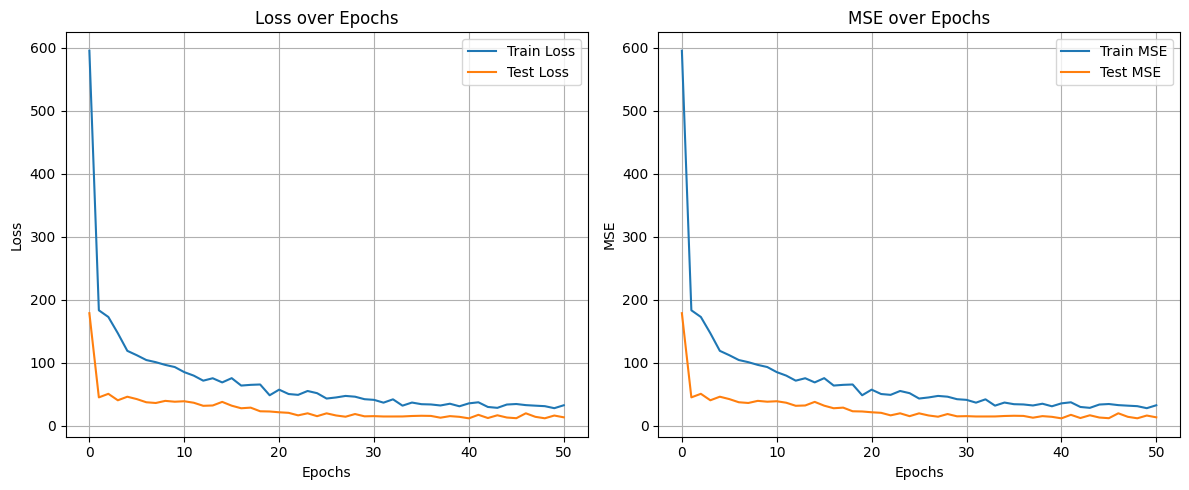

In [31]:
# ✅ Plot learning curves
plt.figure(figsize=(12, 5))

# 👇 Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.grid(True)

# 👇 Accuracy or MSE Curve
plt.subplot(1, 2, 2)
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
else:
    plt.plot(history.history['mse'], label='Train MSE')
    plt.plot(history.history['val_mse'], label='Test MSE')
    plt.ylabel('MSE')
    plt.title('MSE over Epochs')

plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()